# Purpose
In this notebook, there are two goals. <br>
1. We will look at a study that looked at 14 subject's HIV sequences at two timepoints. With these sequences, we will construct a phylogenetic tree and compute similarity scores between the two timepoint RNA sequences.
2. We will explore some conservation patterns of the HORMAD2 gene. This gene is has been shown to have many integration sites that the Human Immunodeficiency Virus (HIV) targets when integrating into the human DNA. Towards the end of the notebook, we will look at DNase signals as well.
 

## Papers Used as Inspiration for this Notebook

Abdissa, A., Yilma, D., Fonager, J., Audelin, A. M., Christensen, L. H., Olsen, M. F., … Andersen, A. B. (2014). Drug resistance in HIV patients with virological failure or slow virological response to antiretroviral therapy in Ethiopia. BMC Infectious Diseases, 14(1). doi:10.1186/1471-2334-14-181

Maldarelli, F., Wu, X., Su, L., Simonetti, F., Wells, D., Shao, W., … Hughes, S. (2016). B-108 Specific HIV integration sites are linked to clonal expansion and persistence of infected cells. JAIDS Journal of Acquired Immune Deficiency Syndromes, 71, 44. doi:10.1097/01.qai.0000479721.09749.2d

## Data
HIV RNA Data <br>
https://www.hiv.lanl.gov/components/sequence/HIV/search/search.comp?submit=Retrieve+selected+sets&ipsearch_selected=0&value+patient+pat_num_timepoints+4=*&value+PUBlication+PUB_pubmedEntry+4=*&value+publication+pub_articletitle+1=%21%3D+DirectwholeSubmission&ipsearch=e8ac5ada&action=search 
<br>
<br>
Supplmentary Data from second paper: 
<br>
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4262401/bin/NIHMS646339-supplement-Maldarelli_et_al_Supplementary_data.pdf
<br><br>
Conservation Data <br>
http://hgdownload.soe.ucsc.edu/goldenPath/hg19/phyloP100way/ 
<br>
<br>
Gene Exons 
<br>
https://useast.ensembl.org/Homo_sapiens/Transcript/Exons?db=core;g=ENSG00000176635;r=22:30080174-30177075;t=ENST00000336726
<br>
<br>
DNase Signal Data <br>
http://hgdownload.soe.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeUwDnase/wgEncodeUwDnaseGm12878RawRep1.bigWig
<br>
<br>

## Phylogenetic Tree Tool
EMBL-EBI Phylo Tool <br>
https://www.ebi.ac.uk/Tools/phylogeny/simple_phylogeny/

### Contact
Please contact Danilo Pena (danilo.a.pena@uth.tmc.edu) for any questions or concerns. 

Thank you for passing by.

# Imports

In [247]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import numpy as np
import math

#Stats package
import scipy.stats as stats

#Plotting in the notebook
%matplotlib inline

#Sequence analysis libraries
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import SeqIO
from Bio.SubsMat import MatrixInfo as matlist

# HIV RNA Analysis

In [248]:
#Matrix used to calculate similarity score 
matrix = matlist.blosum62

#Retrieve aligned sequences
sequences = []
ids = []

#Open fasta file and retrieve sequences/ids
for record in SeqIO.parse("abdissa_aa_aligned_pol.fasta", "fasta"):
    sequences.append(record.seq)
    ids.append(record.id)

In [249]:
#List of IDs
all_ids = []

#Grab ids of samples
for i in ids:
    cur_id = i[0:3]
    
    all_ids.append(cur_id)

#Ensure that ids are a set
all_ids = set(all_ids)

## Sequence Work

In [250]:
#Dictionary that will store protein sequences
protein_seq_dict = {}

#Loop through all sequences
for sequence in range(len(sequences)):
    
    #Array that stores amino acids (AA)
    sequence_prot = []
    
    #Grab current AA sequence
    sequence_prot = sequences[sequence]
    
    #Process string
    sequence_prot = "".join(list(sequence_rna))
    sequence_prot = "".join([i for i in sequence_prot if i != '-'])
    
    #Add to dictionary
    protein_seq_dict[sequence] = sequence_prot

In [251]:
#Diplay data
protein_seq_dict

{0: 'PQITLWQRPLVSIKVGGQIKEALLDTGADDTVLEEINLPGRWKPKMIGGIGGFIKVRQYDQIAIEICGKKAIGTVLVGPTPVNIIGRNLLTQLGCTLNFPISPIETVPVKLKPGMDGPKVKQWPLTEEKIRALXEICKEMEKEGKITKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEIQLGIPHPSGLKKNKSVTVLDVGDAYFSVPLHESFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPSIFQSSMTKILEPFRAKNPELVIYQYIDDLYVGSDLEIGQHRAKIEELREHLLKWGFTTPDKKHQKEHPFLWMGYELHPDKWTVQPIQLPNKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTDIVTLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQG',
 1: 'PQITLWQRPLVSIKVGGQIKEALLDTGADDTVLEEINLPGRWKPKMIGGIGGFIKVRQYDQIAIEICGKKAIGTVLVGPTPVNIIGRNLLTQLGCTLNFPISPIETVPVKLKPGMDGPKVKQWPLTEEKIRALXEICKEMEKEGKITKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEIQLGIPHPSGLKKNKSVTVLDVGDAYFSVPLHESFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPSIFQSSMTKILEPFRAKNPELVIYQYIDDLYVGSDLEIGQHRAKIEELREHLLKWGFTTPDKKHQKEHPFLWMGYELHPDKWTVQPIQLPNKDSWTVNDIQKLVGKLNWASQIYPGIKVKQLCKLLRGTKALTDIVTLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQG',
 2: 'PQITLWQRPLVSIKVGGQIKEALLDTGADDTVLEEINLPGRWKPKMIGGIGGFIKVRQYDQIAIEICGKKAIGTVLVGPTPVNIIGRNLLTQLGCTLNFPISPIETVPVKLKPGM

In [252]:
#Array that will be turned into dataframe for the alignment scores
matching_df = []

#Loop through all samples
for i in all_ids:
    
    indices = []
    
    #Ensure that samples match
    for j in range(len(ids)):
        
        if ids[j][0:3] == i:
            indices.append(j)

    print('Indicies for matching samples:', indices)
    
    #Percentage of matches in RNA sequences and print
    alignments = (pairwise2.align.globalxx(sequences[indices[0]], sequences[indices[1]]))
    print('Percentage of matches', alignments[0][2] / min((len(sequences[indices[0]]), len(sequences[indices[1]]))))
    
    #Append to dataframe
    matching_df.append({'sample': indices[0]+1, 'percentage_match':alignments[0][2] / min((len(sequences[indices[0]]), len(sequences[indices[1]])))})

    #Aligned protein sequence score
    alignments = pairwise2.align.globaldx(protein_seq_dict[indices[0]], protein_seq_dict[indices[1]], matrix)
    print('Blosum62 score:', alignments[0][2] / min((len(protein_seq_dict[indices[0]]), len(protein_seq_dict[indices[1]]))))

    #Length of protein seq
    print('Lengths of First/Second sequences:', len(protein_seq_dict[indices[0]]), len(protein_seq_dict[indices[1]]))

    print('='*30)

Indicies for matching samples: [9, 26]
Percentage of matches 0.9714285714285714
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [5, 17]
Percentage of matches 0.9938775510204082
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [13, 24]
Percentage of matches 0.9918367346938776
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [6, 21]
Percentage of matches 0.9897959183673469
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [10, 20]
Percentage of matches 0.9857142857142858
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [1, 15]
Percentage of matches 0.9713701431492843
Blosum62 score: 5.30787037037037
Lengths of First/Second sequences: 432 432
Indicies for matching samples: [11, 25]
Percentage of matches 

In [253]:
#Turn array to dataframe
matching_df = pd.DataFrame(matching_df)

(0.9, 1)

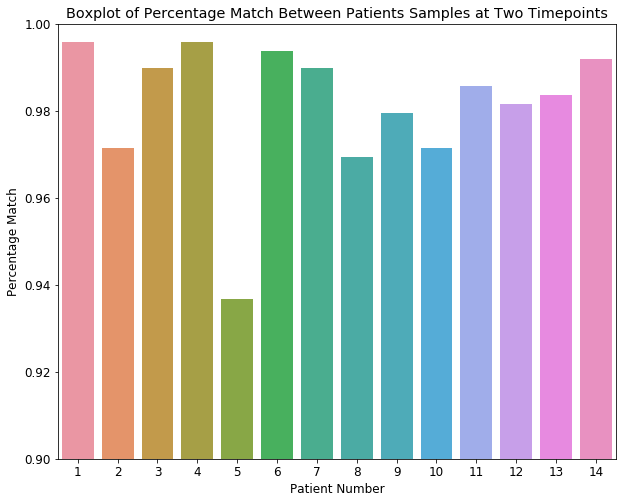

In [290]:
#Plot percentage match of RNA
plt.figure(figsize=(10, 8))
# plt.rcParams.update({'font.size': 16})
plt.title('Boxplot of Percentage Match Between Patients Samples at Two Timepoints')
sns.barplot(x='sample', y='percentage_match', data=matching_df)
plt.xlabel('Patient Number')
plt.ylabel('Percentage Match')
plt.ylim((0.9, 1)) 

## Phylo Tree

In [255]:
#Phylo tree plot
from ete3 import Tree
tree = Tree('tree.xml')
print('Phylogenetic Tree of HIV RNA Samples')
print(tree)

Phylogenetic Tree of HIV RNA Samples

         /-146.KJ561122.C.2011.1299.HIV-1
      /-|
     |   \-146.KJ561141.C.2012.1299.HIV-1
   /-|
  |  |   /-300.KJ561128.C.2011.1299.HIV-1
  |   \-|
  |      \-300.KJ561144.C.2012.1299.HIV-1
  |
  |               /-157.KJ561123.C.2011.1299.HIV-1
  |            /-|
  |           |   \-157.KJ561138.C.2012.1299.HIV-1
  |         /-|
  |        |  |   /-243.KJ561125.C.2011.1299.HIV-1
  |        |   \-|
  |      /-|      \-243.KJ561139.C.2011.1299.HIV-1
  |     |  |
  |     |  |   /-314.KJ561136.C.2011.1299.HIV-1
  |     |   \-|
  |     |      \-314.KJ561147.C.2012.1299.HIV-1
  |     |
  |   /-|         /-346.KJ561131.C.2012.1299.HIV-1
  |  |  |      /-|
  |  |  |     |   \-346.KJ561149.C.2012.1299.HIV-1
  |  |  |   /-|
  |  |  |  |  |   /-360.KJ561134.C.2010.1299.HIV-1
  |  |  |  |   \-|
  |  |   \-|      \-360.KJ561148.C.2011.1299.HIV-1
  |  |     |
--|  |     |   /-357.KJ561133.C.2012.1299.HIV-1
  |  |      \-|
  |  |         \-357.KJ561143.C.201

# CHR 22 HORMAD2

## Conservation

In [256]:
#Read in chromosome 22 conservation data
hormad_consv = pd.read_csv('chr22_consv.bgr', sep='\t', header=None)

In [257]:
#Set columns and show dataframe
cols = ['chr', 'start', 'end', 'conservation']
hormad_consv.columns = cols
hormad_consv.tail()

,chr,start,end,conservation
32239905,chr22,51244022,51244023,0.122
32239906,chr22,51244023,51244027,0.104
32239907,chr22,51244027,51244029,0.117
32239908,chr22,51244029,51244030,0.106
32239909,chr22,51244030,51244031,0.104


In [258]:
#Integration of signal
hormad_consv['integration_of_signal'] = hormad_consv['conservation'] * (abs(hormad_consv['end'] - hormad_consv['start']))

In [259]:
#Read in exon data 
hormad_exons = pd.read_csv('exon_regions.csv')

In [260]:
#Set columns and show data
hormad_exons.columns = ['region', 'start', 'end', 'region_length', 'phase_at_end']
hormad_exons

,region,start,end,region_length,phase_at_end
0,UTR_1,"30,489,904","30,489,941",NaN,NaN
1,Exon_1,"30,489,942","30,489,992",51.0,0.0
2,Exon_2,"30,494,841","30,494,982",142.0,1.0
3,Exon_3,"30,499,426","30,499,489",64.0,2.0
4,Exon_4,"30,500,390","30,500,426",37.0,0.0
5,Exon_5,"30,507,785","30,507,805",21.0,0.0
6,Exon_6,"30,508,485","30,508,511",27.0,0.0
7,Exon_7,"30,514,969","30,515,036",68.0,2.0
8,Exon_8,"30,517,621","30,517,778",158.0,1.0
9,Exon_9,"30,517,953","30,518,203",251.0,0.0


### Whole Gene

In [261]:
#Set the start/end 
hormad_start = 30476452
hormad_end = 30573062

#Filter conservation for HORMAD2 gene
hormad_start_end_consv = hormad_consv[(hormad_consv['start'] > hormad_start) & (hormad_consv['end'] < hormad_end)]

In [262]:
print('Sum of Conservation: ', hormad_start_end_consv['integration_of_signal'].sum())
print('Mean Conservation: ', hormad_start_end_consv['integration_of_signal'].mean())
print('Standard Deviation of Conservation: ', hormad_start_end_consv['integration_of_signal'].std())

Sum of Conservation:  26147.568
Mean Conservation:  0.2889776864162385
Standard Deviation of Conservation:  1.0058046378049506


Text(0.5,0,'Conservation')

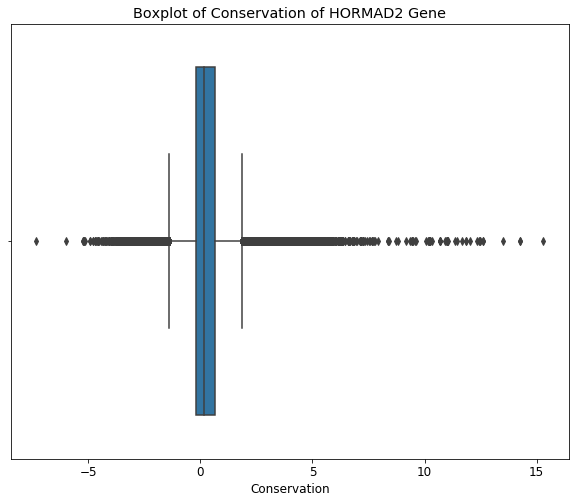

In [297]:
#Plot
plt.figure(figsize=(10, 8))
# plt.rcParams.update({'font.size': 16})
plt.title('Boxplot of Conservation of HORMAD2 Gene')
sns.boxplot(hormad_start_end_consv['integration_of_signal'])
plt.xlabel('Conservation')

### Promoter Region

In [264]:
#Number of nucleotides before HORMAD2 start
thresh = 500

#Reset bounds
hormad_promoter_start = hormad_start - thresh
hormad_promoter_end = hormad_start 

#Filter
hormad_promoter_consv = hormad_consv[(hormad_consv['start'] > hormad_promoter_start) & (hormad_consv['end'] < hormad_promoter_end)]

Text(0.5,0,'Conservation')

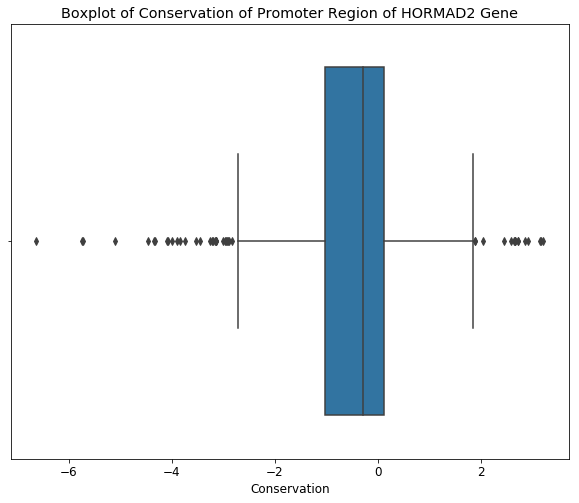

In [296]:
#Plot
plt.figure(figsize=(10, 8))
# plt.rcParams.update({'font.size': 16})
plt.title('Boxplot of Conservation of Promoter Region of HORMAD2 Gene')
sns.boxplot(hormad_promoter_consv['integration_of_signal'])
plt.xlabel('Conservation')

In [266]:
print('Sum of Conservation: ', hormad_promoter_consv['integration_of_signal'].sum())
print('Mean Conservation: ', hormad_promoter_consv['integration_of_signal'].mean())
print('Standard Deviation of Conservation: ', hormad_promoter_consv['integration_of_signal'].std())

Sum of Conservation:  -228.947
Mean Conservation:  -0.4606579476861173
Standard Deviation of Conservation:  1.3328044164854191


### Exons

In [267]:
#Exploring the exons 
for i in range(len(hormad_exons)):
    
    #Grab region and start/end coordinates
    region = hormad_exons.loc[i]['region']
    start = (int(hormad_exons.loc[i]['start'].replace(',','')))
    end = (int(hormad_exons.loc[i]['end'].replace(',','')))
    
    #Filter
    cur_df = hormad_consv[(hormad_consv['start'] > start) & (hormad_consv['end'] < end)]
    
    #Print statements
    print('Region: ', region)
    print('Conservation Sum: ', cur_df['integration_of_signal'].sum())
    print('Conservation Mean: ', cur_df['integration_of_signal'].mean())
    print('--'*5)

Region:  UTR_1
Conservation Sum:  17.281
Conservation Mean:  0.493742857142857
----------
Region:  Exon_1
Conservation Sum:  47.82
Conservation Mean:  0.99625
----------
Region:  Exon_2
Conservation Sum:  289.52
Conservation Mean:  2.1288235294117643
----------
Region:  Exon_3
Conservation Sum:  136.007
Conservation Mean:  2.3052033898305084
----------
Region:  Exon_4
Conservation Sum:  90.071
Conservation Mean:  2.6491470588235293
----------
Region:  Exon_5
Conservation Sum:  35.613
Conservation Mean:  2.094882352941177
----------
Region:  Exon_6
Conservation Sum:  55.506
Conservation Mean:  2.4133043478260876
----------
Region:  Exon_7
Conservation Sum:  207.784
Conservation Mean:  3.2466250000000003
----------
Region:  Exon_8
Conservation Sum:  370.436
Conservation Mean:  2.4054285714285717
----------
Region:  Exon_9
Conservation Sum:  494.866
Conservation Mean:  2.0281393442622937
----------
Region:  Exon_10
Conservation Sum:  120.822
Conservation Mean:  1.1962574257425738
--------

In [294]:
#Will plot the conservation values within each region
frames = []

#Loop through exons/UTRs
for i in range(len(hormad_exons)):
    
    #Grab region and start/end coordinates
    region = hormad_exons.loc[i]['region']
    start = (int(hormad_exons.loc[i]['start'].replace(',','')))
    end = (int(hormad_exons.loc[i]['end'].replace(',','')))
    
    #Filter
    cur_df = hormad_consv[(hormad_consv['start'] > start) & (hormad_consv['end'] < end)]
    cur_df['region'] = region
    
    #Ensure that data is correct
    cols = ['region', 'integration_of_signal']
    df_for_boxplots = cur_df[cols]
    
    #Append to final processed array
    frames.append(df_for_boxplots)

#Create dataframe
final_df_boxplots = pd.concat(frames)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'Conservation')

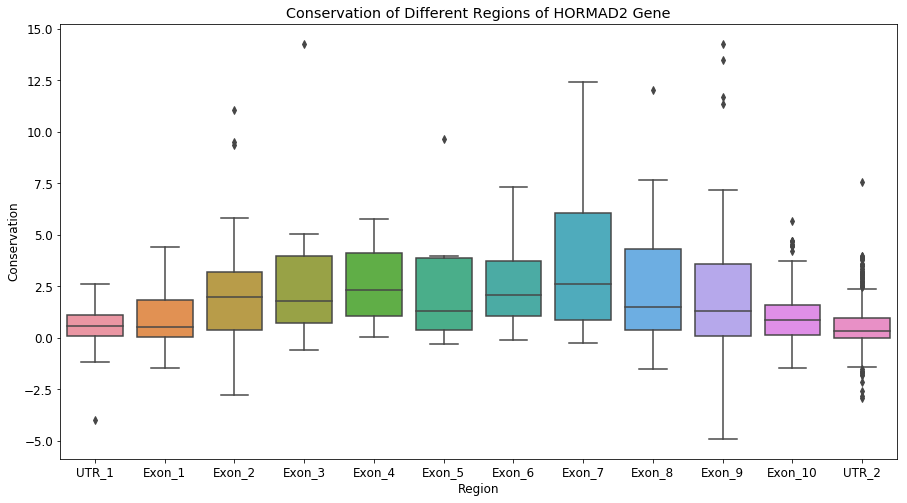

In [295]:
#Plot
plt.figure(figsize=(15, 8))
# plt.rcParams.update({'font.size': 16})
plt.title('Conservation of Different Regions of HORMAD2 Gene')
sns.boxplot(x='region', y='integration_of_signal', data=final_df_boxplots)
plt.xlabel('Region')
plt.ylabel('Conservation')

In [270]:
#Here, we plot
data = [] 

for i, row in hormad_exons.iterrows():
    
    cur_df = dnase_signals[(dnase_signals['start'] > int(row['start'].replace(',',''))) & (dnase_signals['end'] < int(row['end'].replace(',','')))]
    
    signal = cur_df['integration_of_signal'].sum()
    
    data.append({'region': row['region'], 'signal': signal})
    
site_dnase_signal = pd.DataFrame(data)

Text(0,0.5,'DNase Signal')

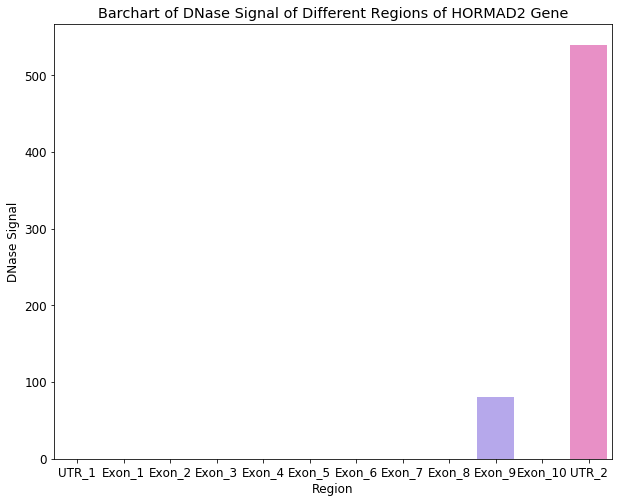

In [292]:
#Plot
plt.figure(figsize=(10, 8))
plt.title('Barchart of DNase Signal of Different Regions of HORMAD2 Gene')
# plt.rcParams.update({'font.size': 12})
sns.barplot(x='region', y='signal', data=site_dnase_signal)
plt.xlabel('Region')
plt.ylabel('DNase Signal')

### Integration Sites

In [272]:
#Now we will explore the integration sites from the paper

#Read in integration sites taken from supplmentary material
integration_sites = pd.read_csv('hormad_integration_sites.txt', sep=' ')

In [273]:
#Show data
integration_sites.head()

,Sample,Chr,Start,LTR,Strand,End,Distance,Intron/Exon/Distance,Ref_ID,Gene,Strand.1,TxStart,TxEnd
0,PT1_Y11.4,chr22,30514664,5',>,30514391,273,intron,NM_152510,HORMAD2,+,30476452,30573062
1,PT3_Y7.2,chr22,30515408,3',>,30514808,600,intron,NM_152510,HORMAD2,+,30476452,30573062
2,PT3_Y7.2,chr22,30515408,3',>,30514848,560,intron,NM_152510,HORMAD2,+,30476452,30573062
3,PT3_Y7.2,chr22,30515408,3',>,30514946,462,intron,NM_152510,HORMAD2,+,30476452,30573062
4,PT3_Y7.2,chr22,30515408,3',>,30514957,451,intron,NM_152510,HORMAD2,+,30476452,30573062


In [274]:
integration_sites['Intron/Exon/Distance'].value_counts()

intron    64
Name: Intron/Exon/Distance, dtype: int64

In [275]:
integration_sites['Distance'].median()

180.0

Text(0.5,0,'Distance (nucleotides)')

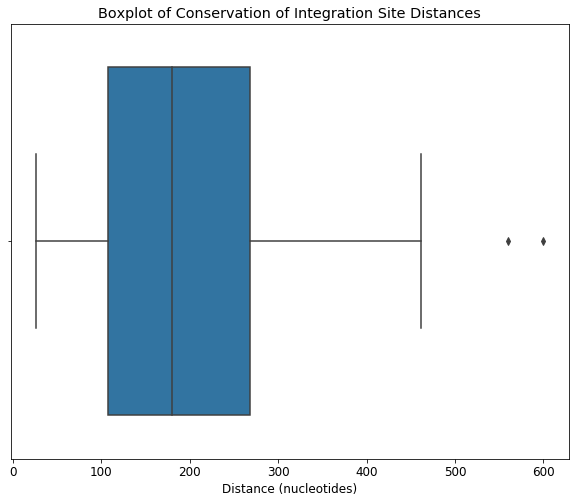

In [291]:
#Plot distances of integration sites
plt.figure(figsize=(10, 8))
# plt.rcParams.update({'font.size': 16})
plt.title('Boxplot of Conservation of Integration Site Distances')
sns.boxplot(integration_sites['Distance'])
plt.xlabel('Distance (nucleotides)')

In [277]:
#This block of code will ensure that each integration site is 1000 nucleotides long
#This way, we can do some further analysis 

#Arrays that will store the new integration site start/end coordinates
integration_start = []
integration_end = []

#Loop through main integration site dataframe
for i, row in integration_sites.iterrows():
    
    #Diff will help dictate how to shift the start/ends
    diff = (1000 - row['Distance'])/2
    
    #If even
    if diff % 2 == 0:
        
        #Shift start/end
        integration_start_thresh = int(row['Start'] + diff)
        integration_end_thresh = int(row['End'] - diff)
        
        #Append to list
        integration_start.append(integration_start_thresh)
        integration_end.append(integration_end_thresh)
    
    #If odd
    else:
        #Shift start/end
        integration_start_thresh = int(row['Start'] + int(diff))
        integration_end_thresh = int(row['End'] - math.ceil(diff))

        #Append to list
        integration_start.append(integration_start_thresh)
        integration_end.append(integration_end_thresh)

In [278]:
#Add arrays into final dataframe
integration_sites['start_thresh'] = integration_start
integration_sites['end_thresh'] = integration_end

In [279]:
#Now that we have integration sites that are 1000 nucleotides long each, we can explore the conservation patterns

#Back to our conservation dataframe
hormad_consv.head()

,chr,start,end,conservation,integration_of_signal
0,chr22,16050000,16050001,0.132,0.132
1,chr22,16050001,16050002,0.127,0.127
2,chr22,16050002,16050003,0.114,0.114
3,chr22,16050003,16050004,0.113,0.113
4,chr22,16050004,16050005,0.114,0.114


In [280]:
#Array that will store necessary data for plot
frames = []

#Loop through integration sites
for i in range(len(integration_sites)):
    
    #Grab integration site number, start/end coordinates
    integration_num = i
    start = integration_sites.loc[i]['start_thresh']
    end = integration_sites.loc[i]['end_thresh']
    
    #Filter
    cur_df = hormad_consv[(hormad_consv['start'] < start) & (hormad_consv['end'] > end)]
    cur_df['integration_num'] = integration_num
    
    #Ensure that data are correct
    cols = ['integration_num', 'integration_of_signal']
    df_for_boxplots = cur_df[cols]
    
    #Append
    frames.append(df_for_boxplots)

#Create a dataframe
final_df_boxplots = pd.concat(frames)

C:\Users\danil\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [281]:
#Show data
final_df_boxplots.tail()

,integration_num,integration_of_signal
12886453,63,1.587
12886454,63,0.424
12886455,63,-0.022
12886456,63,0.208
12886457,63,0.407


Text(0,0.5,'Conservation')

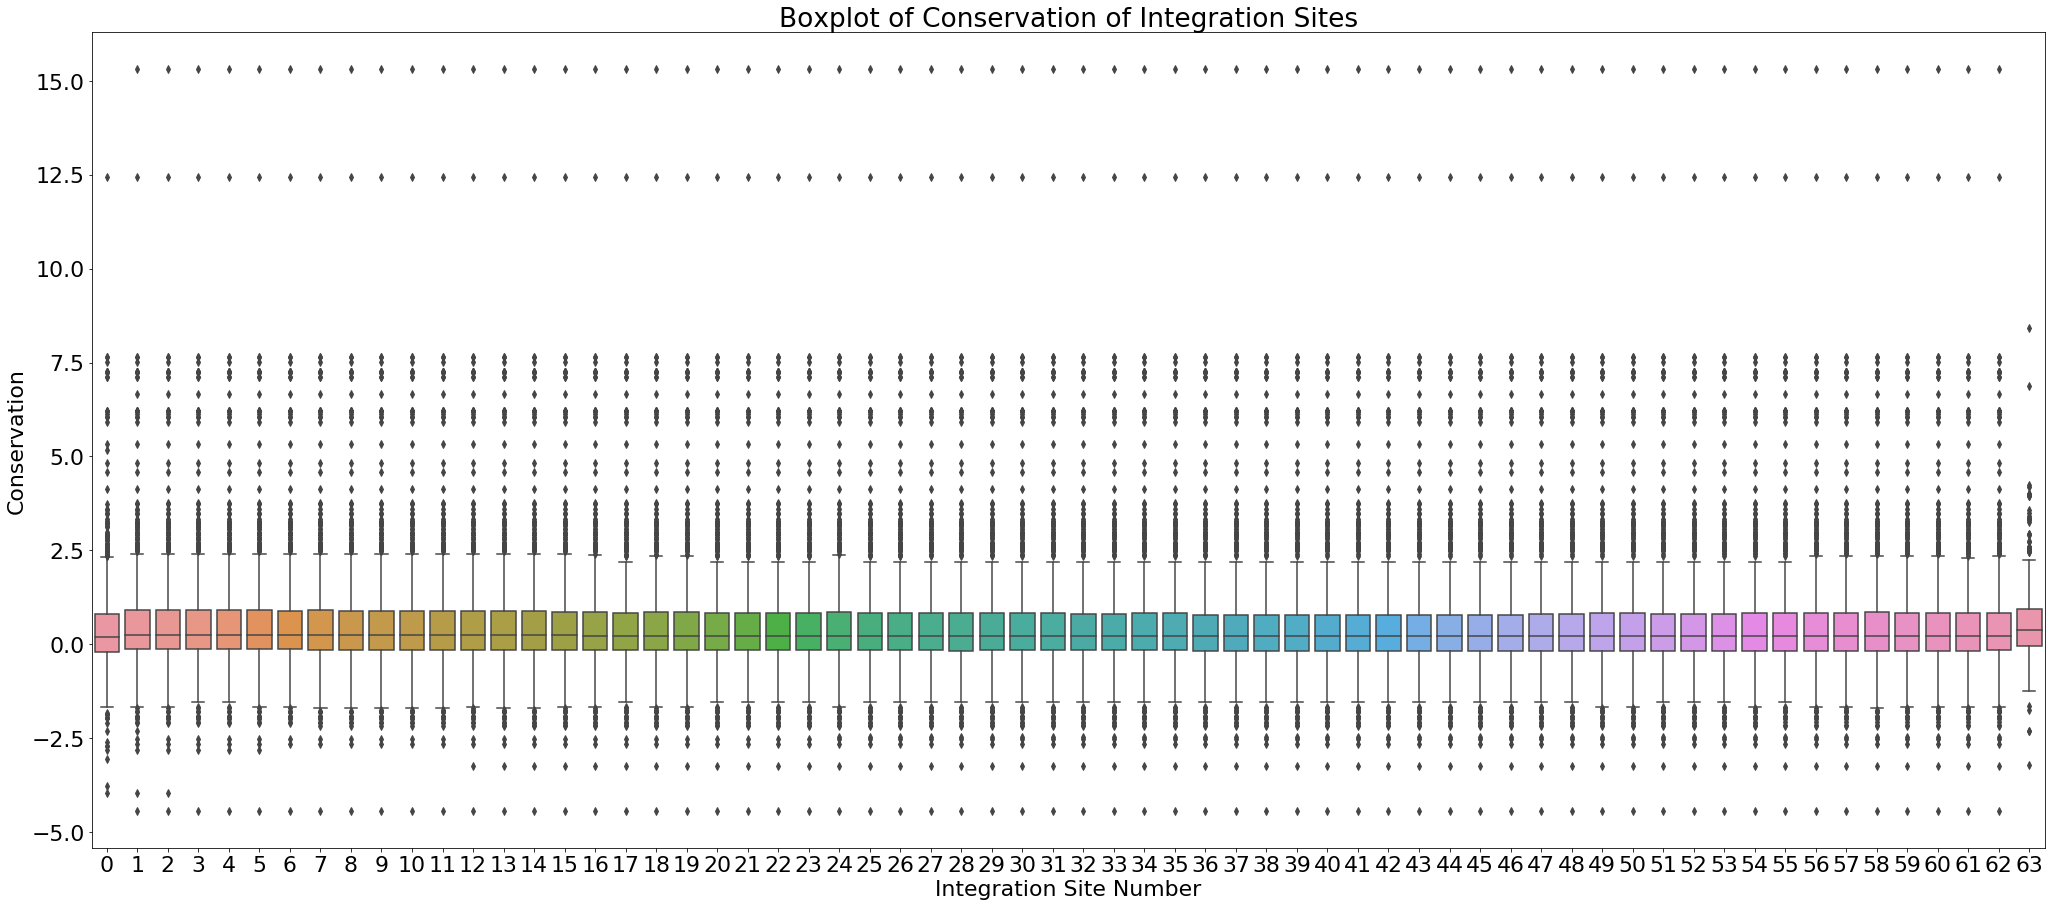

In [282]:
#Boxplot of all integration sites conservations over 1000 bp
plt.figure(figsize=(35, 15))
plt.rcParams.update({'font.size': 22})
plt.title('Boxplot of Conservation of Integration Sites')
sns.boxplot(x='integration_num', y='integration_of_signal', data=final_df_boxplots)
plt.xlabel('Integration Site Number')
plt.ylabel('Conservation')

In [283]:
#Added conservation signals of all integration sites

#Array of 500 points
add_array = [0]*500

#Loop through all integration sites
for i in range(len(integration_sites)):
    
    #Grab start/end values
    integration_num = i
    start = integration_sites.loc[i]['start_thresh']
    end = integration_sites.loc[i]['end_thresh']
    
    #This ensures that there are enough values to add
    #Idea
    # Nucleotide 900 ----------------------------- Nucleotide 0
    # Take middle 500
    # Nucleotide 900 --+----------------------+-- Nucleotide 0 
    diff = int((abs(end - start) - 500)/2)
    start = start - diff 
    
    cur_df = hormad_consv[(hormad_consv['start'] < start) & (hormad_consv['end'] > end)]
    
    #Take first 500 (should be middle since we )
    add_array = add_array + cur_df['integration_of_signal'].values[:500]

([<matplotlib.axis.XTick at 0x28901679518>,
 <a list of 5 Text xticklabel objects>)

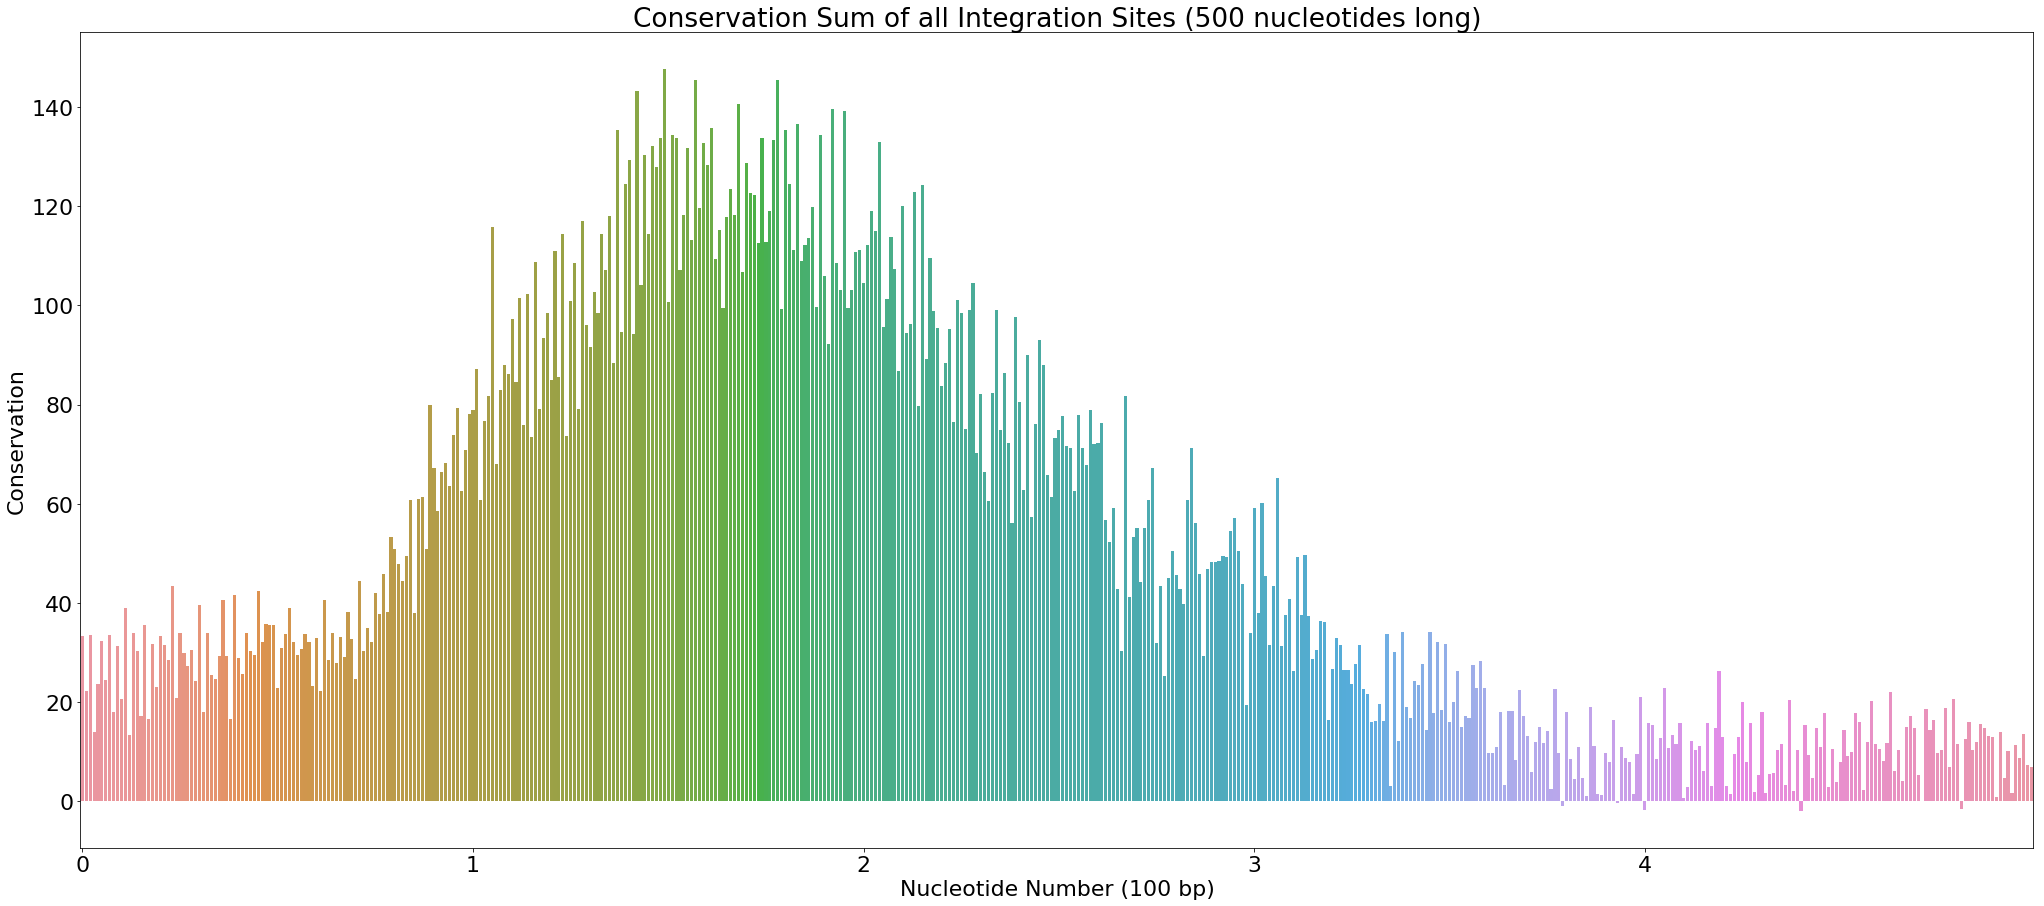

In [284]:
site_num = list(range(len(add_array)))

#Plot
plt.figure(figsize=(35, 15))
plt.rcParams.update({'font.size': 22})
plt.title('Conservation Sum of all Integration Sites (500 nucleotides long)')
sns.barplot(x=site_num, y=add_array)
plt.xlabel('Nucleotide Number (100 bp)')
plt.ylabel('Conservation')
plt.xticks(np.arange(min(site_num), max(site_num)+1, 100))

In [285]:
#Now, we will explore the relationship between conservation and DNase signals

#Read in data and set columns
dnase_signals = pd.read_csv('chr22_dnase.bgr', sep='\t', header=None)
dnase_signals.columns = ['chr', 'start', 'end', 'signal']

#Create integration of signal for conservation and dnase signal
dnase_signals['integration_of_signal'] = dnase_signals['signal'] * (abs(dnase_signals['end'] - dnase_signals['start']))

In [286]:
#This block of code is quite lengthy.
#The ultimate goal is to grab each integration site and correlate that site's DNase signal with the conservation
#To do this, we must divide each of the data grabbed into four regions, essentially creating four data point pairs
#Then we correlate!

#Custom ways to segment data into 4 parts
dnase_dict = {4: [(0,1), (1,2), (2,3), (3,4)],
              8: [(0,2), (2,4), (4,6), (6,8)],
              10: [(0,2), (2,5), (5,7), (7,10)],
              11: [(0,2), (2,5), (5,8), (8,11)]
             }

consv_dict = {650: [(0,162), (163,324), (325, 487), (483, 650)],
              997: [(0,249), (250,500), (501, 750), (751, 997)],
              998: [(0,249), (250,500), (501, 750), (751, 998)]
             }

#Arrays that will store all data
dnase_array_all = []
consv_array_all = []

#Array for final df
stats_df = []

#Loop through integration sites
for i in range(len(integration_sites)):
    
    #Start/ends
    start = integration_sites.loc[i]['start_thresh']
    end = integration_sites.loc[i]['end_thresh']
    
    #####################################
    #DNase signal
    cur_dnase_df = dnase_signals[(dnase_signals['start'] < start) & (dnase_signals['end'] > end)]
    rows, cols = cur_dnase_df.shape
    
    #Array to store current integration site's DNase signals
    dnase_array = []
    
    #Loop through each segmented data portion
    for j in dnase_dict[rows]:
        
        #Grab start/end indices
        start_dnase, end_dnase = j
        
        #Sum the signal and append
        dnase_sum = cur_dnase_df[start_dnase:end_dnase]['integration_of_signal'].sum()
        dnase_array.append(dnase_sum)
    
    #Append into larger list
    dnase_array_all.append(dnase_array)
    
    #####################################
    #Conservation signal
    cur_consv_df = hormad_consv[(hormad_consv['start'] < start) & (hormad_consv['end'] > end)]
    rows_consv, cols_consv = cur_consv_df.shape
    
    #Array to store current integration site's conservation signals
    consv_array = []

    #Loop through each segmented data portion
    for j in consv_dict[rows_consv]:
        
        #Grab start/end indices
        start_consv, end_consv = j
        
        #Sum the signal and append
        consv_sum = cur_consv_df[start_consv:end_consv]['integration_of_signal'].sum()
        consv_array.append(consv_sum)
    
    #Append into larger list
    consv_array_all.append(consv_array)
    
    #Print correlation statistics
    r, p = stats.pearsonr(dnase_array, consv_array)
    print('Site: ', i+1)
    print('Correlation Coefficient ', r)
    print('P-value: ', p)
    
    if p <= 0.05:
        print('Statistically Significant!')
    else:
        print('Not Significant')
        
    stats_df.append({'site': i+1, 'coef': r, 'pval': p})
    
    print('---')

Site:  1
Correlation Coefficient  -0.691180393439
P-value:  0.308819606561
Not Significant
---
Site:  2
Correlation Coefficient  -0.636538066046
P-value:  0.363461933954
Not Significant
---
Site:  3
Correlation Coefficient  -0.601256406152
P-value:  0.398743593848
Not Significant
---
Site:  4
Correlation Coefficient  -0.608224105497
P-value:  0.391775894503
Not Significant
---
Site:  5
Correlation Coefficient  -0.630365747245
P-value:  0.369634252755
Not Significant
---
Site:  6
Correlation Coefficient  -0.630969524599
P-value:  0.369030475401
Not Significant
---
Site:  7
Correlation Coefficient  -0.656781826308
P-value:  0.343218173692
Not Significant
---
Site:  8
Correlation Coefficient  -0.761405633364
P-value:  0.238594366636
Not Significant
---
Site:  9
Correlation Coefficient  -0.834216138996
P-value:  0.165783861004
Not Significant
---
Site:  10
Correlation Coefficient  -0.894146255662
P-value:  0.105853744338
Not Significant
---
Site:  11
Correlation Coefficient  -0.95652032834

Text(0,0.5,'Correlation Coefficient (r)')

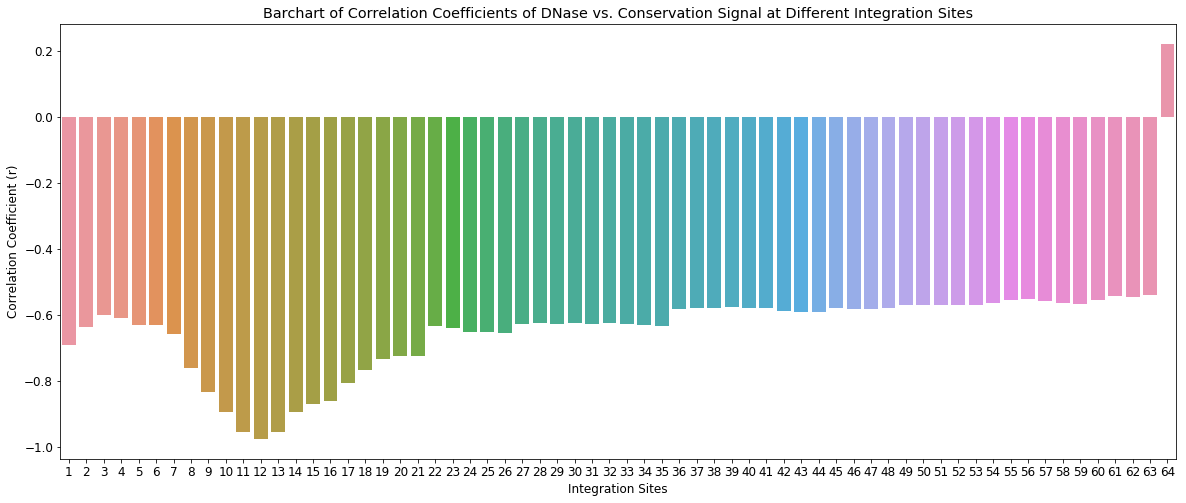

In [287]:
stats_df = pd.DataFrame(stats_df)

#Plot
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 12})
plt.title('Barchart of Correlation Coefficients of DNase vs. Conservation Signal at Different Integration Sites')
sns.barplot(x='site', y='coef', data=stats_df)

plt.xlabel('Integration Sites')
plt.ylabel('Correlation Coefficient (r)')

Text(0,0.5,'P-value')

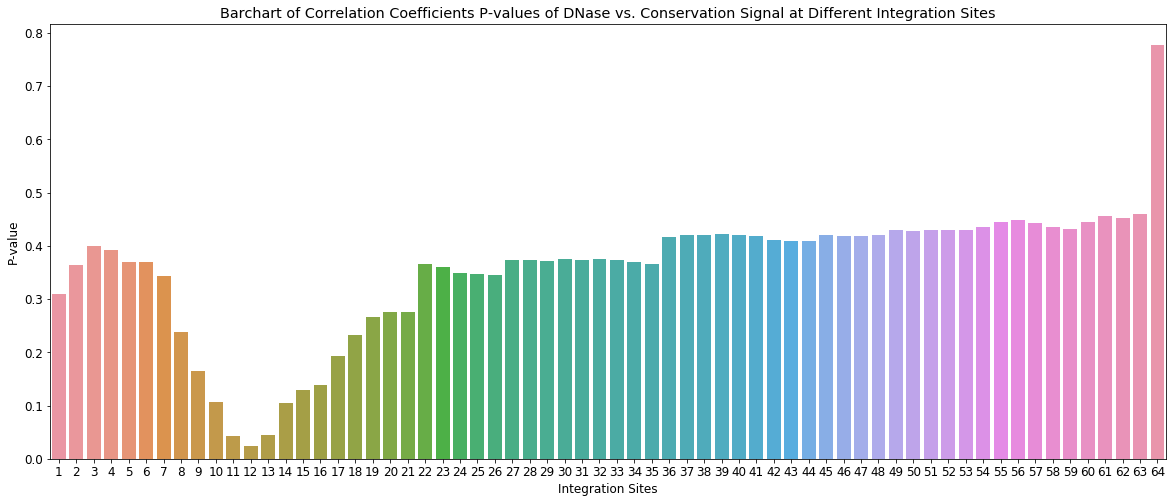

In [288]:
#Plot
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 12})

plt.title('Barchart of Correlation Coefficients P-values of DNase vs. Conservation Signal at Different Integration Sites')
sns.barplot(x='site', y='pval', data=stats_df)
plt.xlabel('Integration Sites')
plt.ylabel('P-value')

In [289]:
integration_sites.loc[9:12]

,Sample,Chr,Start,LTR,Strand,End,Distance,Intron/Exon/Distance,Ref_ID,Gene,Strand.1,TxStart,TxEnd,start_thresh,end_thresh
9,PT3_Y7.2,chr22,30515408,3',>,30515056,352,intron,NM_152510,HORMAD2,+,30476452,30573062,30515732,30514732
10,PT3_Y7.2,chr22,30515408,3',>,30515070,338,intron,NM_152510,HORMAD2,+,30476452,30573062,30515739,30514739
11,PT3_Y7.2,chr22,30515408,3',>,30515076,332,intron,NM_152510,HORMAD2,+,30476452,30573062,30515742,30514742
12,PT3_Y7.2,chr22,30515408,3',>,30515092,316,intron,NM_152510,HORMAD2,+,30476452,30573062,30515750,30514750
